# Simple Digit Recognisor

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

- Load data

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

np.uint8(5)

-  flattern input

In [10]:
x_train_flattern = x_train.reshape(len(x_train), 28*28) # there is an easy way to flattern by using tensorflow.keras.layers.Flatten
x_test_flattern = x_test.reshape(len(x_test), 28*28) 
x_train_flattern[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

- normalize data by deviding maximum of dataset(now all data varie vithing 0-1)

In [11]:
x_train_flattern = x_train_flattern / 255.0
x_test_flattern = x_test_flattern / 255.0

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(x_train_flattern, y_train, epochs=5) 

c:\Users\dului\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8800 - loss: 0.4622
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9154 - loss: 0.3032
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9207 - loss: 0.2833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9234 - loss: 0.2731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9251 - loss: 0.2668


In [16]:
model.evaluate(x_test_flattern, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9260 - loss: 0.2666


[0.2665735185146332, 0.9259999990463257]

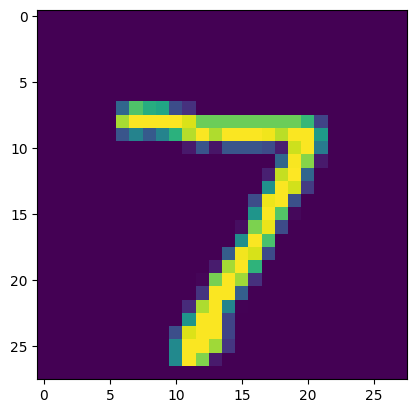

In [19]:
plt.imshow(x_test[0])

In [20]:
predicts = model.predict(x_test_flattern)
predicts[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


array([1.3742152e-02, 2.6724942e-07, 4.2969666e-02, 9.6439952e-01,
       2.6955199e-03, 1.0607882e-01, 2.2304271e-06, 9.9979943e-01,
       9.9923320e-02, 7.0012629e-01], dtype=float32)

In [21]:
np.argmax(predicts[0])

np.int64(7)

- impiment by adding more hidden layers

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
# x_train_flattern = tf.flattern(x_train) Also we can do this like this 
model.fit(x_train_flattern, y_train, epochs=5) 

c:\Users\dului\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9214 - loss: 0.2759
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9628 - loss: 0.1256
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9737 - loss: 0.0874
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0681
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0534


In [23]:
model.evaluate(x_test_flattern, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.0956


[0.09556545317173004, 0.9700000286102295]

In [ ]:
predicts = model.predict(x_test_flattern)

In [30]:
cm = [np.argmax(i) for i in predicts]
cf = tf.math.confusion_matrix(labels=y_test, predictions=cm)

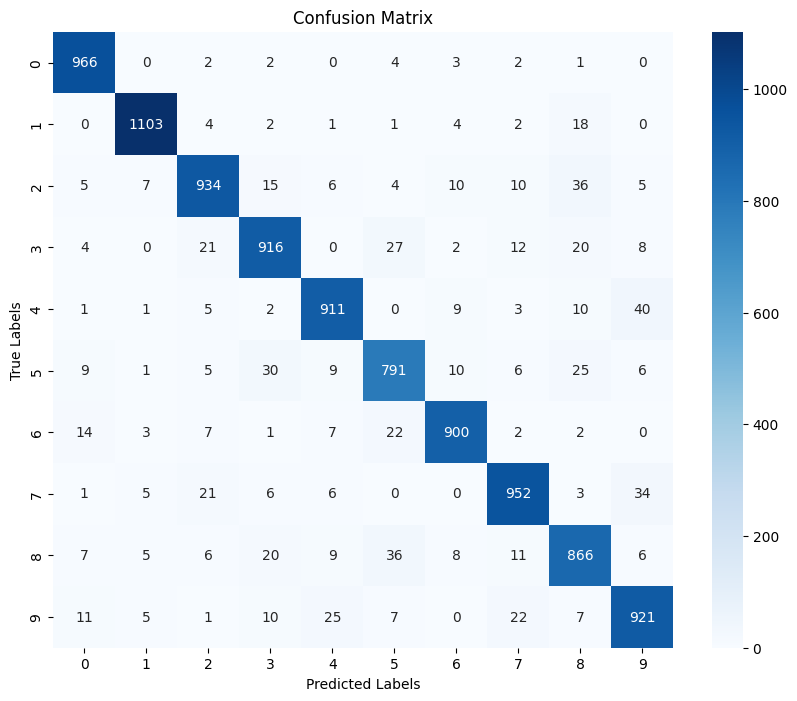

In [ ]:
import seaborn as sns

# this show the confusion matrix of our model that means how many predictions are correct and incorrectly classified by our model.
#Blue boxes show corectly predictions and other boxes show incorrectly classified
# Generate the confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()